In [1]:
from matplotlib import pyplot as plt

import numpy as np

from fit.mesh.mesh import Mesh
from fit.solver.solve_poisson import solve_poisson

%load_ext autoreload
%autoreload 2

In [2]:
## Generate mesh
xmesh = np.linspace(0, 10, 10)
ymesh = np.linspace(0, 10, 10)
zmesh = np.linspace(0, 10, 2)
msh = Mesh(xmesh, ymesh, zmesh)

In [3]:
## Set boundary conditions
bc = np.full(msh.np, np.nan)
idx_bc_1 = [msh.idx(0, j, 0) for j in range(10)]
idx_bc_2 = [msh.idx(9, j, 0) for j in range(10)]
bc[idx_bc_1] = 0
bc[idx_bc_2] = 1
print(idx_bc_1)
print(idx_bc_2)
print(bc)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
[9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
[ 0. nan nan nan nan nan nan nan nan  1.  0. nan nan nan nan nan nan nan
 nan  1.  0. nan nan nan nan nan nan nan nan  1.  0. nan nan nan nan nan
 nan nan nan  1.  0. nan nan nan nan nan nan nan nan  1.  0. nan nan nan
 nan nan nan nan nan  1.  0. nan nan nan nan nan nan nan nan  1.  0. nan
 nan nan nan nan nan nan nan  1.  0. nan nan nan nan nan nan nan nan  1.
  0. nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]


In [4]:
## Solve system
eps = 8.854e-12
phi = solve_poisson(msh, np.zeros(msh.np), eps, bc)
print(phi)

[ 0. nan nan nan nan nan nan nan nan  1.  0. nan nan nan nan nan nan nan
 nan  1.  0. nan nan nan nan nan nan nan nan  1.  0. nan nan nan nan nan
 nan nan nan  1.  0. nan nan nan nan nan nan nan nan  1.  0. nan nan nan
 nan nan nan nan nan  1.  0. nan nan nan nan nan nan nan nan  1.  0. nan
 nan nan nan nan nan nan nan  1.  0. nan nan nan nan nan nan nan nan  1.
  0. nan nan nan nan nan nan nan nan  1. nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]


C:\Users\devin\anaconda3\envs\multiphysics\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:293: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


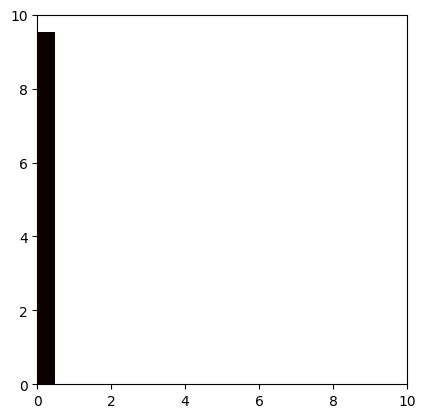

In [13]:
## Plot solution
phi_plot = np.reshape(phi, (msh.nz, msh.ny, msh.nx))
plt.imshow(phi_plot[0,:,:], cmap='hot')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.show()